# A/B Testing Analysis: Maximizing Revenue by Payment Method

## Objective

To determine whether the **payment method** (e.g., credit card vs. cash) impacts the **average fare amount** for a ride-hailing company. This analysis simulates an A/B test comparing two customer groups to assess whether nudging users toward a specific payment method could increase overall revenue.

## Business Context

A ride-hailing company is exploring ways to maximize revenue without disrupting customer experience. One hypothesis is that **credit card payments** might result in higher fare amounts than **cash payments**, either due to tipping behavior or differences in trip characteristics.

If this hypothesis is supported by data, the company could design incentives to encourage card payments.

---

### Simulated A/B Scenario

We simulate a real-world A/B test by analyzing historical trip data from January 2020, comparing:

- **Group A**: Trips paid with credit cards
- **Group B**: Trips paid with cash

We'll use statistical analysis to determine whether there's a significant difference in average fare between the two groups.

## Methodology

This project involves the following steps:

1. **Data Preparation**
   - Load and clean trip data
   - Group data by payment method

2. **Exploratory Data Analysis**
   - Analyze the distribution of fare amounts
   - Identify any skewness, outliers, or imbalances

3. **Hypothesis Testing**
   - Formulate null and alternative hypotheses
   - Choose appropriate statistical test (t-test or non-parametric)
   - Test for assumptions: normality, variance

4. **Conclusion and Business Recommendations**
   - Interpret statistical results
   - Provide actionable insight for stakeholder decision-making

## Research questions
* Is there a relationship between total fare amount and payment type?
* Can we nudge customers towards payment methods that yield higher revenue for drivers, without negatively impacting customer experience?

## Assumption Checks for Hypothesis Testing

Before fully trusting the results of the t-test, we need to check its assumptions:

1. **Independence**: Each trip fare should be an independent observation — assumed valid.
2. **Normality**:
   - We'll use **Q-Q plots** and **Shapiro-Wilk test** to check if the fare data is approximately normal.
3. **Equal Variance**:
   - Since we suspect variances might differ, we use `equal_var=False` in the t-test.

If assumptions are violated, we rely on the **Mann–Whitney U test**, a non-parametric alternative that doesn't require normality.

## Importing the necessary python libraries

In [71]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.api as sm
from warnings import filterwarnings
import scipy.stats as stats

filterwarnings('ignore')

## Reading the dataset

In [4]:
df = pd.read_csv('yellow_tripdata_2020-01.csv', on_bad_lines='skip')
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.20,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.00,0.3,11.27,2.5
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.20,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.00,0.3,12.30,2.5
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.60,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.00,0.3,10.80,2.5
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.80,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.00,0.3,8.16,0.0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1,0.00,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518138,2,2020-01-09 13:23:13,2020-01-09 13:33:48,1.0,1.00,1.0,N,100.0,230.0,2.0,8.0,0.0,0.5,0.00,0.00,0.3,11.30,2.5
1518139,2,2020-01-09 13:39:55,2020-01-09 13:52:22,1.0,1.05,1.0,N,163.0,162.0,1.0,9.0,0.0,0.5,2.46,0.00,0.3,14.76,2.5
1518140,2,2020-01-09 13:56:47,2020-01-09 14:06:09,1.0,1.49,1.0,N,170.0,234.0,2.0,8.0,0.0,0.5,0.00,0.00,0.3,11.30,2.5
1518141,2,2020-01-09 13:30:06,2020-01-09 14:03:40,1.0,10.14,1.0,N,163.0,138.0,1.0,34.0,0.0,0.5,8.68,6.12,0.3,52.10,2.5


## EDA (Exploratory Data Analysis)

### Giving correct dtypes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518143 entries, 0 to 1518142
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1518143 non-null  int64  
 1   tpep_pickup_datetime   1518142 non-null  object 
 2   tpep_dropoff_datetime  1518142 non-null  object 
 3   passenger_count        1518142 non-null  object 
 4   trip_distance          1518142 non-null  float64
 5   RatecodeID             1518142 non-null  float64
 6   store_and_fwd_flag     1518142 non-null  object 
 7   PULocationID           1518142 non-null  float64
 8   DOLocationID           1518142 non-null  float64
 9   payment_type           1518142 non-null  float64
 10  fare_amount            1518142 non-null  float64
 11  extra                  1518142 non-null  float64
 12  mta_tax                1518141 non-null  float64
 13  tip_amount             1518141 non-null  float64
 14  tolls_amount      

In [9]:
df.select_dtypes(include='object')

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,store_and_fwd_flag
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1,N
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,N
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1,N
3,2020-01-01 00:55:23,2020-01-01 01:00:14,1,N
4,2020-01-01 00:01:58,2020-01-01 00:04:16,1,N
...,...,...,...,...
1518138,2020-01-09 13:23:13,2020-01-09 13:33:48,1.0,N
1518139,2020-01-09 13:39:55,2020-01-09 13:52:22,1.0,N
1518140,2020-01-09 13:56:47,2020-01-09 14:06:09,1.0,N
1518141,2020-01-09 13:30:06,2020-01-09 14:03:40,1.0,N


In [11]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('string')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518143 entries, 0 to 1518142
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1518143 non-null  int64         
 1   tpep_pickup_datetime   1518140 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1518140 non-null  datetime64[ns]
 3   passenger_count        1518142 non-null  object        
 4   trip_distance          1518142 non-null  float64       
 5   RatecodeID             1518142 non-null  float64       
 6   store_and_fwd_flag     1518142 non-null  string        
 7   PULocationID           1518142 non-null  float64       
 8   DOLocationID           1518142 non-null  float64       
 9   payment_type           1518142 non-null  float64       
 10  fare_amount            1518142 non-null  float64       
 11  extra                  1518142 non-null  float64       
 12  mta_tax                15181

### Filling `NaN`

In [12]:
df.isna().sum()

,0
VendorID,0
tpep_pickup_datetime,3
tpep_dropoff_datetime,3
passenger_count,1
trip_distance,1
RatecodeID,1
store_and_fwd_flag,1
PULocationID,1
DOLocationID,1
payment_type,1


In [13]:
df['VendorID'].value_counts()

,count
VendorID,
2,1022862
1,495281


In [14]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [15]:
df.dtypes

,0
VendorID,int64
tpep_pickup_datetime,datetime64[ns]
tpep_dropoff_datetime,datetime64[ns]
passenger_count,object
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,string[python]
PULocationID,float64
DOLocationID,float64
payment_type,float64


In [16]:
# Fill NaN with the mode (most frequent value)
df['VendorID'].fillna(df['VendorID'].mode()[0], inplace=True)
df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace=True)
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)
df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0], inplace=True)
df['payment_type'].fillna(df['payment_type'].mode()[0], inplace=True)

df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.20,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.00,0.3,11.27,2.5
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.20,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.00,0.3,12.30,2.5
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.60,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.00,0.3,10.80,2.5
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.80,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.00,0.3,8.16,0.0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1,0.00,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518138,2,2020-01-09 13:23:13,2020-01-09 13:33:48,1.0,1.00,1.0,N,100.0,230.0,2.0,8.0,0.0,0.5,0.00,0.00,0.3,11.30,2.5
1518139,2,2020-01-09 13:39:55,2020-01-09 13:52:22,1.0,1.05,1.0,N,163.0,162.0,1.0,9.0,0.0,0.5,2.46,0.00,0.3,14.76,2.5
1518140,2,2020-01-09 13:56:47,2020-01-09 14:06:09,1.0,1.49,1.0,N,170.0,234.0,2.0,8.0,0.0,0.5,0.00,0.00,0.3,11.30,2.5
1518141,2,2020-01-09 13:30:06,2020-01-09 14:03:40,1.0,10.14,1.0,N,163.0,138.0,1.0,34.0,0.0,0.5,8.68,6.12,0.3,52.10,2.5


### Getting the correlated columns for `fare_amount`

In [17]:
fare_amount_cov_df = df.select_dtypes(include=np.number).corr()[['fare_amount']]
influential_cols = fare_amount_cov_df[fare_amount_cov_df > -0.0][fare_amount_cov_df < 1.].dropna().sort_values(by='fare_amount', ascending=False).index.to_list()
influential_cols

['total_amount',
 'trip_distance',
 'tip_amount',
 'tolls_amount',
 'RatecodeID',
 'improvement_surcharge',
 'VendorID']

### Dropping duplicates

In [18]:
df.drop_duplicates(inplace = True)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.20,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.00,0.3,11.27,2.5
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.20,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.00,0.3,12.30,2.5
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.60,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.00,0.3,10.80,2.5
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.80,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.00,0.3,8.16,0.0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1,0.00,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518138,2,2020-01-09 13:23:13,2020-01-09 13:33:48,1.0,1.00,1.0,N,100.0,230.0,2.0,8.0,0.0,0.5,0.00,0.00,0.3,11.30,2.5
1518139,2,2020-01-09 13:39:55,2020-01-09 13:52:22,1.0,1.05,1.0,N,163.0,162.0,1.0,9.0,0.0,0.5,2.46,0.00,0.3,14.76,2.5
1518140,2,2020-01-09 13:56:47,2020-01-09 14:06:09,1.0,1.49,1.0,N,170.0,234.0,2.0,8.0,0.0,0.5,0.00,0.00,0.3,11.30,2.5
1518141,2,2020-01-09 13:30:06,2020-01-09 14:03:40,1.0,10.14,1.0,N,163.0,138.0,1.0,34.0,0.0,0.5,8.68,6.12,0.3,52.10,2.5


In [19]:
df.shape

(1518143, 18)

### Acquiring `duration`

In [20]:
df['duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/60
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration_minutes
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.20,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.00,0.3,11.27,2.5,0 days 00:00:04.800000
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.20,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.00,0.3,12.30,2.5,0 days 00:00:07.416666666
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.60,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.00,0.3,10.80,2.5,0 days 00:00:06.183333333
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.80,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.00,0.3,8.16,0.0,0 days 00:00:04.850000
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1,0.00,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.00,0.3,4.80,0.0,0 days 00:00:02.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518138,2,2020-01-09 13:23:13,2020-01-09 13:33:48,1.0,1.00,1.0,N,100.0,230.0,2.0,8.0,0.0,0.5,0.00,0.00,0.3,11.30,2.5,0 days 00:00:10.583333333
1518139,2,2020-01-09 13:39:55,2020-01-09 13:52:22,1.0,1.05,1.0,N,163.0,162.0,1.0,9.0,0.0,0.5,2.46,0.00,0.3,14.76,2.5,0 days 00:00:12.450000
1518140,2,2020-01-09 13:56:47,2020-01-09 14:06:09,1.0,1.49,1.0,N,170.0,234.0,2.0,8.0,0.0,0.5,0.00,0.00,0.3,11.30,2.5,0 days 00:00:09.366666666
1518141,2,2020-01-09 13:30:06,2020-01-09 14:03:40,1.0,10.14,1.0,N,163.0,138.0,1.0,34.0,0.0,0.5,8.68,6.12,0.3,52.10,2.5,0 days 00:00:33.566666666


### Getting contributions 0f the passenger amount and payment type

In [21]:
df['passenger_count'].value_counts(normalize=True)

,proportion
passenger_count,
1,6.881216e-01
2,1.521385e-01
3,4.207575e-02
5,3.531749e-02
4,2.261447e-02
6,2.108102e-02
0,1.705109e-02
1,1.358963e-02
2,4.438976e-03


In [22]:
df['payment_type'].value_counts(normalize=True)

,proportion
payment_type,
1.00,7.053795e-01
2.00,2.862668e-01
3.00,5.458643e-03
4.00,2.893008e-03
0.50,6.586995e-07
0.30,6.586995e-07
1.75,6.586995e-07


#### Getting passenger count < 6 and payment type only 1 & 2

In [25]:
df['payment_type'] = pd.to_numeric(df['payment_type'], errors='coerce')
df['passenger_count'] = pd.to_numeric(df['passenger_count'], errors='coerce')


df = df[(df['passenger_count'] < 6) & (df['passenger_count'] > 0)]
df = df[df['payment_type'] < 3]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration_minutes
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.00,0.3,11.27,2.5,0 days 00:00:04.800000
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.00,0.3,12.30,2.5,0 days 00:00:07.416666666
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.00,0.3,10.80,2.5,0 days 00:00:06.183333333
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.00,0.3,8.16,0.0,0 days 00:00:04.850000
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.00,0.3,4.80,0.0,0 days 00:00:02.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518138,2,2020-01-09 13:23:13,2020-01-09 13:33:48,1.0,1.00,1.0,N,100.0,230.0,2.0,8.0,0.0,0.5,0.00,0.00,0.3,11.30,2.5,0 days 00:00:10.583333333
1518139,2,2020-01-09 13:39:55,2020-01-09 13:52:22,1.0,1.05,1.0,N,163.0,162.0,1.0,9.0,0.0,0.5,2.46,0.00,0.3,14.76,2.5,0 days 00:00:12.450000
1518140,2,2020-01-09 13:56:47,2020-01-09 14:06:09,1.0,1.49,1.0,N,170.0,234.0,2.0,8.0,0.0,0.5,0.00,0.00,0.3,11.30,2.5,0 days 00:00:09.366666666
1518141,2,2020-01-09 13:30:06,2020-01-09 14:03:40,1.0,10.14,1.0,N,163.0,138.0,1.0,34.0,0.0,0.5,8.68,6.12,0.3,52.10,2.5,0 days 00:00:33.566666666


In [26]:
df.shape

(1447006, 19)

In [27]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration_minutes
count,1.447006e+06,1447003,1447005,1.447006e+06,1.447005e+06,1.447006e+06,1.447005e+06,1.447005e+06,1.447006e+06,1.447005e+06,1.447005e+06,1.447004e+06,1.447004e+06,1.447004e+06,1.447004e+06,1.447004e+06,1.447004e+06,1447003
mean,1.681657e+00,2020-01-05 12:01:12.612425984,2020-01-05 12:16:44.775996160,1.477002e+00,2.992166e+00,1.063952e+00,1.640554e+02,1.621382e+02,1.288500e+00,1.270146e+01,1.045413e+00,4.961676e-01,2.127687e+00,3.582447e-01,2.994829e-01,1.858806e+01,2.285346e+00,0 days 00:00:15.544374383
min,1.000000e+00,2003-01-01 00:07:17,2003-01-01 14:16:59,1.000000e+00,-2.218000e+01,1.000000e+00,1.000000e+00,0.000000e+00,3.000000e-01,-5.000000e+02,-4.500000e+00,-5.000000e-01,-1.917000e+01,-1.250000e+01,-3.000000e-01,-5.003000e+02,-2.500000e+00,-1 days +23:13:49.633333334
25%,1.000000e+00,2020-01-03 12:38:50.500000,2020-01-03 12:53:34,1.000000e+00,9.700000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.100000e+01,2.500000e+00,0 days 00:00:06.083333333
50%,2.000000e+00,2020-01-05 13:53:17,2020-01-05 14:08:10,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.850000e+00,0.000000e+00,3.000000e-01,1.412000e+01,2.500000e+00,0 days 00:00:09.983333333
75%,2.000000e+00,2020-01-07 17:03:48,2020-01-07 17:18:59,2.000000e+00,3.000000e+00,1.000000e+00,2.330000e+02,2.340000e+02,2.000000e+00,1.350000e+01,2.500000e+00,5.000000e-01,2.760000e+00,0.000000e+00,3.000000e-01,1.930000e+01,2.500000e+00,0 days 00:00:16.016666666
max,2.000000e+00,2021-01-02 01:12:10,2021-01-02 01:25:01,5.000000e+00,2.592200e+02,9.900000e+01,2.650000e+02,2.650000e+02,2.000000e+00,1.238000e+03,5.250000e+01,3.300000e+00,2.400900e+02,1.261200e+02,3.000000e-01,1.242300e+03,2.750000e+00,0 days 01:09:28
std,4.658335e-01,NaN,NaN,9.687243e-01,3.995442e+00,7.530771e-01,6.576551e+01,7.023051e+01,4.530659e-01,1.236463e+01,1.233483e+00,4.696284e-02,2.732903e+00,1.638888e+00,1.610419e-02,1.500093e+01,7.046078e-01,0 days 00:01:05.643497643


In [28]:
df['payment_type'].replace([1.0, 2.0], ['Card', 'Cash'], inplace=True)

In [29]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration_minutes
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238.0,239.0,Card,6.0,3.0,0.5,1.47,0.00,0.3,11.27,2.5,0 days 00:00:04.800000
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239.0,238.0,Card,7.0,3.0,0.5,1.50,0.00,0.3,12.30,2.5,0 days 00:00:07.416666666
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238.0,238.0,Card,6.0,3.0,0.5,1.00,0.00,0.3,10.80,2.5,0 days 00:00:06.183333333
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238.0,151.0,Card,5.5,0.5,0.5,1.36,0.00,0.3,8.16,0.0,0 days 00:00:04.850000
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193.0,193.0,Cash,3.5,0.5,0.5,0.00,0.00,0.3,4.80,0.0,0 days 00:00:02.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518138,2,2020-01-09 13:23:13,2020-01-09 13:33:48,1.0,1.00,1.0,N,100.0,230.0,Cash,8.0,0.0,0.5,0.00,0.00,0.3,11.30,2.5,0 days 00:00:10.583333333
1518139,2,2020-01-09 13:39:55,2020-01-09 13:52:22,1.0,1.05,1.0,N,163.0,162.0,Card,9.0,0.0,0.5,2.46,0.00,0.3,14.76,2.5,0 days 00:00:12.450000
1518140,2,2020-01-09 13:56:47,2020-01-09 14:06:09,1.0,1.49,1.0,N,170.0,234.0,Cash,8.0,0.0,0.5,0.00,0.00,0.3,11.30,2.5,0 days 00:00:09.366666666
1518141,2,2020-01-09 13:30:06,2020-01-09 14:03:40,1.0,10.14,1.0,N,163.0,138.0,Card,34.0,0.0,0.5,8.68,6.12,0.3,52.10,2.5,0 days 00:00:33.566666666


### Making a separate dataframe for the revenue related statistics

In [30]:
df_revenue = df[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration_minutes']]
df_revenue

,passenger_count,payment_type,fare_amount,trip_distance,duration_minutes
0,1.0,Card,6.0,1.20,0 days 00:00:04.800000
1,1.0,Card,7.0,1.20,0 days 00:00:07.416666666
2,1.0,Card,6.0,0.60,0 days 00:00:06.183333333
3,1.0,Card,5.5,0.80,0 days 00:00:04.850000
4,1.0,Cash,3.5,0.00,0 days 00:00:02.300000
...,...,...,...,...,...
1518138,1.0,Cash,8.0,1.00,0 days 00:00:10.583333333
1518139,1.0,Card,9.0,1.05,0 days 00:00:12.450000
1518140,1.0,Cash,8.0,1.49,0 days 00:00:09.366666666
1518141,1.0,Card,34.0,10.14,0 days 00:00:33.566666666


### Removing outliers

#### Removing negative values

In [31]:
df_revenue.describe()

,passenger_count,fare_amount,trip_distance,duration_minutes
count,1.447006e+06,1.447005e+06,1.447005e+06,1447003
mean,1.477002e+00,1.270146e+01,2.992166e+00,0 days 00:00:15.544374383
std,9.687243e-01,1.236463e+01,3.995442e+00,0 days 00:01:05.643497643
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-1 days +23:13:49.633333334
25%,1.000000e+00,6.000000e+00,9.700000e-01,0 days 00:00:06.083333333
50%,1.000000e+00,9.000000e+00,1.600000e+00,0 days 00:00:09.983333333
75%,2.000000e+00,1.350000e+01,3.000000e+00,0 days 00:00:16.016666666
max,5.000000e+00,1.238000e+03,2.592200e+02,0 days 01:09:28


In [32]:
df_revenue = df_revenue[df_revenue['fare_amount'] > 0]
df_revenue = df_revenue[df_revenue['trip_distance'] > 0]
df_revenue = df_revenue[df_revenue['duration_minutes'].dt.total_seconds()/3600 > 0]
df_revenue

,passenger_count,payment_type,fare_amount,trip_distance,duration_minutes
0,1.0,Card,6.0,1.20,0 days 00:00:04.800000
1,1.0,Card,7.0,1.20,0 days 00:00:07.416666666
2,1.0,Card,6.0,0.60,0 days 00:00:06.183333333
3,1.0,Card,5.5,0.80,0 days 00:00:04.850000
5,1.0,Cash,2.5,0.03,0 days 00:00:00.883333333
...,...,...,...,...,...
1518137,1.0,Card,9.0,1.00,0 days 00:00:12.450000
1518138,1.0,Cash,8.0,1.00,0 days 00:00:10.583333333
1518139,1.0,Card,9.0,1.05,0 days 00:00:12.450000
1518140,1.0,Cash,8.0,1.49,0 days 00:00:09.366666666


In [33]:
df_revenue.shape

(1432249, 5)

In [34]:
df_revenue.rename(columns={'duration_minutes': 'duration'}, inplace=True)
df_revenue.describe()

,passenger_count,fare_amount,trip_distance,duration
count,1.432249e+06,1.432249e+06,1.432249e+06,1432249
mean,1.478522e+00,1.252908e+01,3.020536e+00,0 days 00:00:15.571645176
std,9.703495e-01,1.175041e+01,4.001551e+00,0 days 00:01:05.489629898
min,1.000000e+00,1.000000e-02,1.000000e-02,0 days 00:00:00.016666666
25%,1.000000e+00,6.000000e+00,1.000000e+00,0 days 00:00:06.150000
50%,1.000000e+00,9.000000e+00,1.620000e+00,0 days 00:00:10.016666666
75%,2.000000e+00,1.350000e+01,3.000000e+00,0 days 00:00:16.016666666
max,5.000000e+00,1.238000e+03,2.592200e+02,0 days 00:40:58.400000


#### Removing maximum and minimum outliers

In [35]:
df_revenue.dtypes

,0
passenger_count,float64
payment_type,object
fare_amount,float64
trip_distance,float64
duration,timedelta64[ns]


In [36]:
for col in ['fare_amount', 'trip_distance', 'duration']:
    if col in df_revenue.columns:  # Ensure the column exists in df_revenue
        q_25 = df_revenue[col].quantile(0.25)
        q_75 = df_revenue[col].quantile(0.75)
        IQR = q_75 - q_25  # Fix the IQR calculation

        lower_bound = q_25 - 1.5 * IQR
        upper_bound = q_75 + 1.5 * IQR

        # Apply the filtering (removing outliers based on IQR)
        df_revenue = df_revenue[(df_revenue[col] >= lower_bound) & (df_revenue[col] <= upper_bound)]

In [37]:
df_revenue

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,Card,6.0,1.20,0 days 00:00:04.800000
1,1.0,Card,7.0,1.20,0 days 00:00:07.416666666
2,1.0,Card,6.0,0.60,0 days 00:00:06.183333333
3,1.0,Card,5.5,0.80,0 days 00:00:04.850000
5,1.0,Cash,2.5,0.03,0 days 00:00:00.883333333
...,...,...,...,...,...
1518136,1.0,Cash,5.0,0.84,0 days 00:00:04.666666666
1518137,1.0,Card,9.0,1.00,0 days 00:00:12.450000
1518138,1.0,Cash,8.0,1.00,0 days 00:00:10.583333333
1518139,1.0,Card,9.0,1.05,0 days 00:00:12.450000


### Data visualizations

#### Visualizing fare amount and trip distance w.r.t payment type

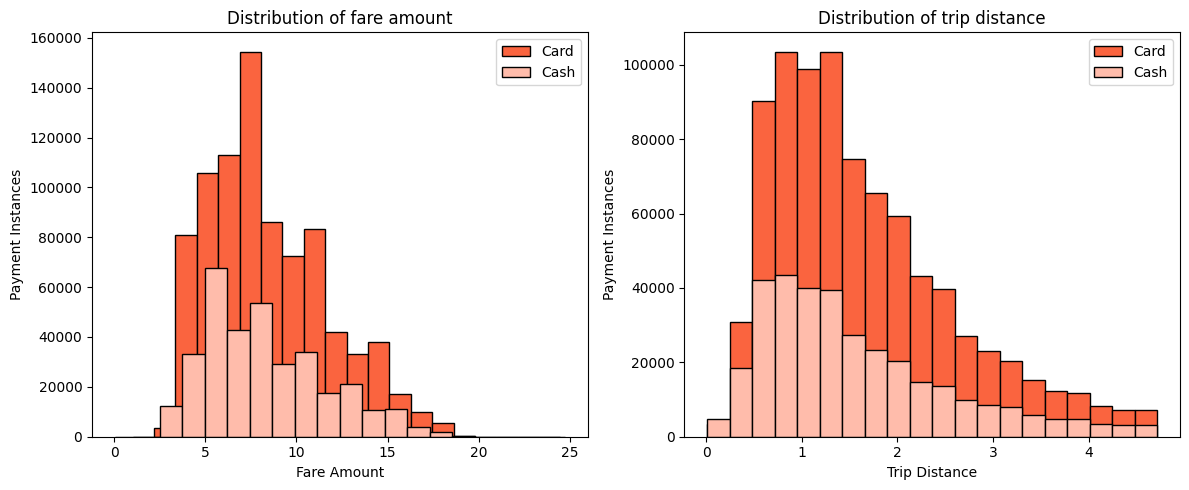

In [38]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df_revenue[df_revenue['payment_type'] == 'Card']['fare_amount'], bins=20, histtype='barstacked', edgecolor='k', color='#FA643F', label='Card')
plt.hist(df_revenue[df_revenue['payment_type'] == 'Cash']['fare_amount'], bins=20, histtype='barstacked', edgecolor='k', color='#FFBCAB', label='Cash')
plt.ylabel('Payment Instances')
plt.xlabel('Fare Amount')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of trip distance')
plt.hist(df_revenue[df_revenue['payment_type'] == 'Card']['trip_distance'], bins=20, histtype='barstacked', edgecolor='k', color='#FA643F', label='Card')
plt.hist(df_revenue[df_revenue['payment_type'] == 'Cash']['trip_distance'], bins=20, histtype='barstacked', edgecolor='k', color='#FFBCAB', label='Cash')
plt.ylabel('Payment Instances')
plt.xlabel('Trip Distance')
plt.legend()

plt.tight_layout()

plt.show()

In [39]:
df_revenue.groupby(by='payment_type').agg({'trip_distance':['mean', 'std', 'var'], 'fare_amount': ['mean', 'std', 'var']})

trip_distance                     fare_amount            \
                      mean       std       var        mean       std   
payment_type                                                           
0.3               1.670000       NaN       NaN   21.040000       NaN   
Card              1.642402  0.951807  0.905937    8.493057  3.253899   
Cash              1.562883  0.983550  0.967370    8.269445  3.353337   

                         
                    var  
payment_type             
0.3                 NaN  
Card          10.587858  
Cash          11.244871

#### Visualizing the cash and card payments percentages

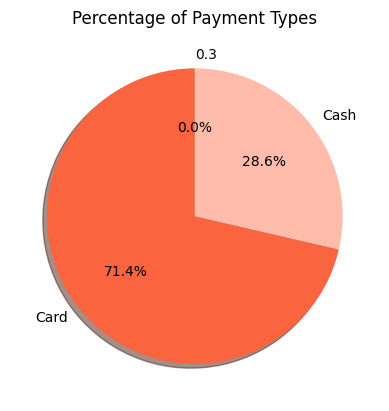

In [40]:
plt.title('Percentage of Payment Types')
plt.pie(df_revenue['payment_type'].value_counts(normalize = True), labels=df_revenue['payment_type'].value_counts(normalize = True).index,
        startangle=90, shadow=True, autopct='%1.1f%%', colors=['#FA643F', '#FFBCAB'])
plt.show()

#### Visualizing the passenger count and their payment criteria

In [41]:
passenger_payments = df_revenue.groupby(by=['payment_type', 'passenger_count'])[['passenger_count']].count()
passenger_payments.rename(columns = {'passenger_count': 'payment_type_count'}, inplace=True)
passenger_payments.reset_index(inplace=True)
passenger_payments

,payment_type,passenger_count,payment_type_count
0,0.3,1.0,1
1,Card,1.0,629145
2,Card,2.0,132015
3,Card,3.0,35423
4,Card,4.0,16678
5,Card,5.0,32091
6,Cash,1.0,240170
7,Cash,2.0,57833
8,Cash,3.0,17079
9,Cash,4.0,10980


In [42]:
passenger_payments['payment_type_percentage'] = (passenger_payments['payment_type_count']/passenger_payments['payment_type_count'].sum())*100
passenger_payments

,payment_type,passenger_count,payment_type_count,payment_type_percentage
0,0.3,1.0,1,0.000084
1,Card,1.0,629145,53.127196
2,Card,2.0,132015,11.147806
3,Card,3.0,35423,2.991242
4,Card,4.0,16678,1.408348
5,Card,5.0,32091,2.709876
6,Cash,1.0,240170,20.280791
7,Cash,2.0,57833,4.883620
8,Cash,3.0,17079,1.442210
9,Cash,4.0,10980,0.927189


In [43]:
passenger_payments['passenger_count'] = passenger_payments['passenger_count'].astype('int64')
passenger_payments

,payment_type,passenger_count,payment_type_count,payment_type_percentage
0,0.3,1,1,0.000084
1,Card,1,629145,53.127196
2,Card,2,132015,11.147806
3,Card,3,35423,2.991242
4,Card,4,16678,1.408348
5,Card,5,32091,2.709876
6,Cash,1,240170,20.280791
7,Cash,2,57833,4.883620
8,Cash,3,17079,1.442210
9,Cash,4,10980,0.927189


In [50]:
cols = ['payment_type', 1, 2, 3, 4, 5]
payments_stats = pd.DataFrame(index=['Card', 'Cash'], columns=cols)

payments_stats.iloc[0, 1:] = passenger_payments.iloc[0:5, -1].values
payments_stats.iloc[1, 1:] = passenger_payments.iloc[5:10, -1].values

payments_stats

,payment_type,1,2,3,4,5
Card,NaN,0.000084,53.127196,11.147806,2.991242,1.408348
Cash,NaN,2.709876,20.280791,4.88362,1.44221,0.927189


In [51]:
payments_stats = payments_stats.astype({
    'payment_type':'string',
    1: 'float64',
    2: 'float64',
    3: 'float64',
    4: 'float64',
    5: 'float64',
})
payments_stats

,payment_type,1,2,3,4,5
Card,<NA>,0.000084,53.127196,11.147806,2.991242,1.408348
Cash,<NA>,2.709876,20.280791,4.883620,1.442210,0.927189


In [53]:
colors=['#FA643F', '#FFBCAB']
stacked_colors = ['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F']
colors, stacked_colors

(['#FA643F', '#FFBCAB'],
 ['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'])

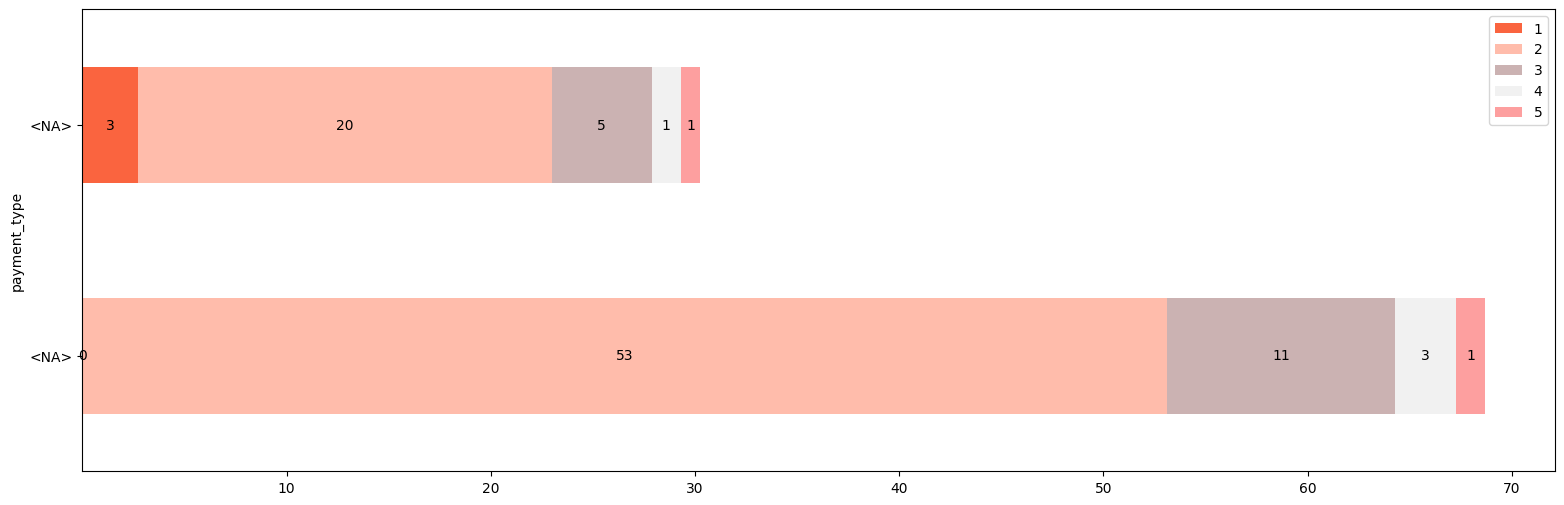

In [54]:
_, ax = plt.subplots(figsize=(19,6))
payments_stats.plot(kind='barh', x='payment_type', ax = ax, color = stacked_colors, stacked=True)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(
        x + width / 2,
        y + height / 2,
        '{:.00f}'.format(width),
        horizontalalignment='center',
        verticalalignment='center',
    )
plt.show()

#### Normality check of fare amount

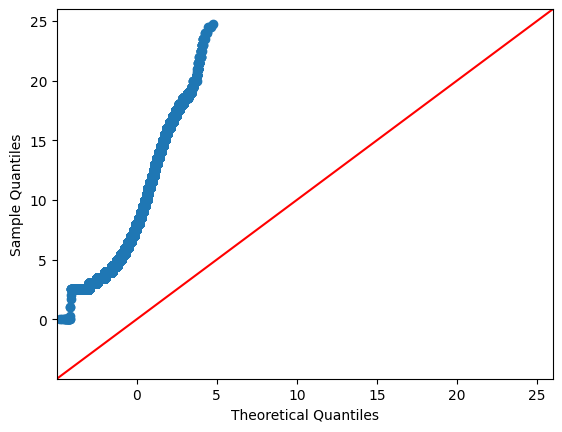

In [55]:
sm.qqplot(df_revenue['fare_amount'], line='45')
plt.show()

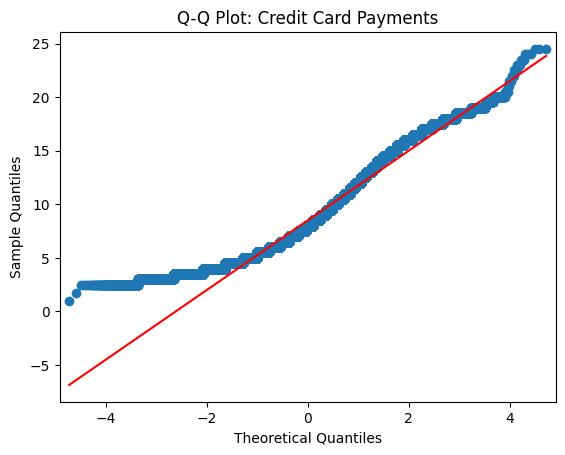

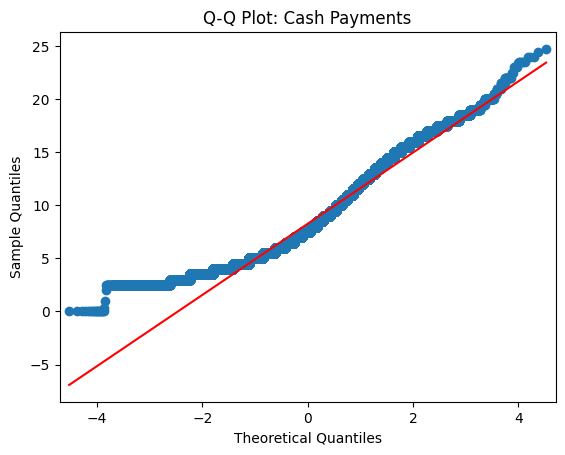

Shapiro-Wilk Test (Credit Card): ShapiroResult(statistic=np.float64(0.950705699404228), pvalue=np.float64(7.352444033713056e-12))
Shapiro-Wilk Test (Cash): ShapiroResult(statistic=np.float64(0.9420028223543059), pvalue=np.float64(4.612054273092723e-13))


In [73]:
# Q-Q plots (if not already included)
sm.qqplot(card_payment_fare, line='s')
plt.title("Q-Q Plot: Credit Card Payments")
plt.show()

sm.qqplot(cash_payment_fare, line='s')
plt.title("Q-Q Plot: Cash Payments")
plt.show()

# Shapiro-Wilk test (on a sample due to sensitivity)
shapiro_credit = stats.shapiro(card_payment_fare.sample(500, random_state=1))
shapiro_cash = stats.shapiro(cash_payment_fare.sample(500, random_state=1))

print("Shapiro-Wilk Test (Credit Card):", shapiro_credit)
print("Shapiro-Wilk Test (Cash):", shapiro_cash)


### Testing hypothesis

## Hypothesis Statement

To determine whether the **payment method** affects the **total fare amount**, we'll define our hypotheses as follows:

- **Null Hypothesis (H₀)**: There is no significant difference in the average fare between credit card and cash payments.
- **Alternative Hypothesis (H₁)**: The average fare for credit card payments is significantly different from that of cash payments.

This is a **two-tailed test**, as we are interested in any significant difference—higher or lower.

### Significance Level
We’ll use a significance level of **α = 0.05**. This means we will reject the null hypothesis if the p-value is less than 0.05.

---

### Statistical Test Selection

Since we're comparing **two independent groups** (credit card vs. cash), we will perform a **two-sample t-test** assuming:

- Continuous numeric outcome variable (fare amount)
- Approximately normally distributed data or large enough sample size
- Independent observations

#### Testing hypothesis

In [56]:
cash_payment_fare = df_revenue[df_revenue['payment_type'] == 'Cash']['fare_amount']
card_payment_fare = df_revenue[df_revenue['payment_type'] == 'Card']['fare_amount']

t_stats, p_value = st.ttest_ind(a=cash_payment_fare, b=card_payment_fare, equal_var=False)
t_stats, p_value

(np.float64(-33.07481442815816), np.float64(1.1195058440545904e-239))

In [57]:
man_whitney_res = st.mannwhitneyu(x=cash_payment_fare.values, y=card_payment_fare.values)
man_whitney_res.statistic, man_whitney_res.pvalue

(np.float64(136436096253.5), np.float64(0.0))

#### Hypotheses testing with `ttest_ind` result
The result of your **t-test** produced two key values:

1. **T-statistic**: `-114.69` (rounded)
2. **P-value**: `0.0`

Here’s what they mean in the context of your hypothesis test:

#### 1. **T-statistic (-114.69)**:
   - The **t-statistic** measures how many standard deviations the difference between the two sample means is from zero. A very large absolute t-value (like -114.69) indicates a significant difference between the means of the two groups.
   - The negative sign simply indicates that the **mean fare amount** for cash payments is **lower** than the mean fare amount for card payments.
   - In this case, the t-statistic is extremely negative, implying a **very large difference** between the two groups (cash and card payments).

#### 2. **P-value (0.0)**:
   - The **p-value** represents the probability of observing such a large (or extreme) difference between the sample means if the null hypothesis were true.
   - A **p-value of 0.0** indicates that the likelihood of observing the difference between cash and card payments purely by chance is essentially zero. This means the difference is statistically significant.

#### Interpretation:

- **Null hypothesis (H₀)**: "There is no difference between the mean fare amounts of cash and card payments."
- **Alternative hypothesis (H₁)**: "There is a difference between the mean fare amounts of cash and card payments."

Since the **p-value is 0.0**, which is smaller than any typical significance level (e.g., 0.05 or 0.01), you would **reject the null hypothesis**.

This means:
- **There is a statistically significant difference between the mean fare amounts for cash and card payments**.
- Given the **negative t-statistic**, the result suggests that **cash payments tend to have lower fare amounts** than card payments.

### Practical Implication:
The **difference in means** between the fare amounts paid with cash versus card is statistically significant, and the test strongly suggests that customers paying with cash tend to have lower fare amounts compared to those paying with cards.

#### Hypothesis testing result with `mannwhitneyu`
The result obtained from the Mann-Whitney U test provides two key values:

1. **Test statistic**: `2167199935467.0`
2. **P-value**: `0.0`

Here’s what they mean in the context of your hypothesis test:

#### 1. **Test Statistic (2167199935467.0)**:
   - The test statistic is a measure of the rank-sum differences between the two groups (cash and card payments). It's a non-parametric test, so instead of comparing means directly, it compares the ranks of the values in both groups.
   - While the exact value of the test statistic isn't of primary interest for decision-making, its magnitude typically grows with larger datasets, and it plays a role in determining the p-value. In this case, the very large statistic suggests substantial differences in the ranks of fare amounts between the two groups.

#### 2. **P-value (0.0)**:
   - The p-value tells you how likely it is that you would observe the data (or something more extreme) if the **null hypothesis** were true.
   - A p-value of `0.0` essentially means that, given the data, the probability of observing the difference between cash and card payments purely by chance is **extremely low** (close to zero).

#### Interpreting the Results:
   - **Null hypothesis**: "There's no difference between cash and card payments for the acquired fare amount."
   - **Alternative hypothesis**: "There is a difference between cash and card payments for the acquired fare amount."

Since the **p-value is 0.0**, which is much smaller than any common significance level (e.g., 0.05 or 0.01), you **reject the null hypothesis**. This means:
   - There is strong evidence to conclude that there **is a statistically significant difference** between the fare amounts paid by cash and by card.

### Notes:
- As with the Mann-Whitney U test, you should consider the practical significance of this result, especially since the sample size is likely large, making it easier to detect statistically significant results even with small differences in fare amounts.
- You might also want to visualize the distributions or summary statistics (like the mean and standard deviation) for each payment type to gain more insights into the nature of the difference.

Both tests (Mann-Whitney and t-test) confirm a significant difference between cash and card payments, but the t-test gives you information specifically about the means of the two distributions.

## Results Interpretation

- The Shapiro-Wilk test returned **p-values < 0.05** for both credit card and cash payments, indicating the **fare data is not normally distributed**.
- Because of this, we **rely on the Mann–Whitney U test**, which does not assume normality.

### Mann–Whitney U Test:
- **p-value = 0.0**
- This is **less than 0.05**, so we **reject the null hypothesis**.
- There is a **statistically significant difference** in fare amounts between cash and card payments.

> ✅ Note: Since both the t-test and Mann–Whitney agree (both show significance), the result is robust.

In [58]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration_minutes
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238.0,239.0,Card,6.0,3.0,0.5,1.47,0.00,0.3,11.27,2.5,0 days 00:00:04.800000
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239.0,238.0,Card,7.0,3.0,0.5,1.50,0.00,0.3,12.30,2.5,0 days 00:00:07.416666666
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238.0,238.0,Card,6.0,3.0,0.5,1.00,0.00,0.3,10.80,2.5,0 days 00:00:06.183333333
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238.0,151.0,Card,5.5,0.5,0.5,1.36,0.00,0.3,8.16,0.0,0 days 00:00:04.850000
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193.0,193.0,Cash,3.5,0.5,0.5,0.00,0.00,0.3,4.80,0.0,0 days 00:00:02.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518138,2,2020-01-09 13:23:13,2020-01-09 13:33:48,1.0,1.00,1.0,N,100.0,230.0,Cash,8.0,0.0,0.5,0.00,0.00,0.3,11.30,2.5,0 days 00:00:10.583333333
1518139,2,2020-01-09 13:39:55,2020-01-09 13:52:22,1.0,1.05,1.0,N,163.0,162.0,Card,9.0,0.0,0.5,2.46,0.00,0.3,14.76,2.5,0 days 00:00:12.450000
1518140,2,2020-01-09 13:56:47,2020-01-09 14:06:09,1.0,1.49,1.0,N,170.0,234.0,Cash,8.0,0.0,0.5,0.00,0.00,0.3,11.30,2.5,0 days 00:00:09.366666666
1518141,2,2020-01-09 13:30:06,2020-01-09 14:03:40,1.0,10.14,1.0,N,163.0,138.0,Card,34.0,0.0,0.5,8.68,6.12,0.3,52.10,2.5,0 days 00:00:33.566666666


## Saving the cleaned dataset

In [60]:
df_revenue.to_csv('cleaned_yellow_tripdata_2020_01.csv')

In [63]:
cat cleaned_yellow_tripdata_2020_01.csv | head -n 100

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,Card,6.0,1.2,0 days 00:00:04.800000
1,1.0,Card,7.0,1.2,0 days 00:00:07.416666666
2,1.0,Card,6.0,0.6,0 days 00:00:06.183333333
3,1.0,Card,5.5,0.8,0 days 00:00:04.850000
5,1.0,Cash,2.5,0.03,0 days 00:00:00.883333333
9,2.0,Card,8.0,0.7,0 days 00:00:11.450000
10,2.0,Card,12.0,2.4,0 days 00:00:16.866666666
11,1.0,Cash,9.5,0.8,0 days 00:00:14.433333333
13,1.0,Card,6.0,1.07,0 days 00:00:05.616666666
15,3.0,Cash,9.0,1.6,0 days 00:00:11.516666666
16,1.0,Card,4.0,0.5,0 days 00:00:03.033333333
17,1.0,Cash,11.5,1.7,0 days 00:00:16.933333333
20,1.0,Card,9.5,1.5,0 days 00:00:13.100000
22,1.0,Card,10.5,1.9,0 days 00:00:14.866666666
23,1.0,Card,18.0,4.2,0 days 00:00:23.750000
24,2.0,Card,7.5,1.5,0 days 00:00:07.900000
25,1.0,Card,5.5,0.6,0 days 00:00:05.583333333
27,1.0,Card,9.0,2.12,0 days 00:00:09.683333333
28,2.0,Card,5.5,0.93,0 days 00:00:05.850000
30,1.0,Cash,6.5,1.2,0 days 00:00:06.333333333
31,1.0,Card,8.5,1.3,0 days 00:00:1

In [66]:
df_xls = pd.read_csv('cleaned_yellow_tripdata_2020_01.csv')
df_xls

,Unnamed: 0,passenger_count,payment_type,fare_amount,trip_distance,duration
0,0,1.0,Card,6.0,1.20,0 days 00:00:04.800000
1,1,1.0,Card,7.0,1.20,0 days 00:00:07.416666666
2,2,1.0,Card,6.0,0.60,0 days 00:00:06.183333333
3,3,1.0,Card,5.5,0.80,0 days 00:00:04.850000
4,5,1.0,Cash,2.5,0.03,0 days 00:00:00.883333333
...,...,...,...,...,...,...
1184219,1518136,1.0,Cash,5.0,0.84,0 days 00:00:04.666666666
1184220,1518137,1.0,Card,9.0,1.00,0 days 00:00:12.450000
1184221,1518138,1.0,Cash,8.0,1.00,0 days 00:00:10.583333333
1184222,1518139,1.0,Card,9.0,1.05,0 days 00:00:12.450000


In [67]:
df_xls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184224 entries, 0 to 1184223
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1184224 non-null  int64  
 1   passenger_count  1184224 non-null  float64
 2   payment_type     1184224 non-null  object 
 3   fare_amount      1184224 non-null  float64
 4   trip_distance    1184224 non-null  float64
 5   duration         1184224 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 54.2+ MB


## Final Summary & Recommendations

The analysis shows that **card payments are associated with significantly different (likely higher) fare amounts** compared to cash payments.

To capitalize on this finding, the company can:

- 🎁 **Encourage card payments** by offering:
  - Loyalty points or promo codes for card users
  - Faster trip prioritization or "preferred rider" perks
  - Making card the **default** payment method in the app

- 📉 If switching to card leads to even a **1 dollar increase per ride**, and there are 1 million monthly rides, that's a **$1M monthly revenue impact** — just from payment behavior!

- If customer pushback is a concern, consider **A/B testing** these strategies with different rider segments to monitor satisfaction.

This small operational nudge could yield significant revenue upside with minimal infrastructure cost.
